# Resumo do Projeto:

## **Análise Comparativa de Modelos de Previsão de Séries Temporais no Conjunto de Dados GISTEMP**
## Introdução
Este projeto se concentra no conjunto de dados GISTEMP, uma compilação crucial de anomalias na temperatura superficial global, para explorar e comparar várias técnicas de modelagem preditiva no contexto de Big Data. O conjunto de dados é estruturado com anos nas linhas e meses nas colunas, representando desvios de temperatura de uma média histórica ao longo de um extenso período de tempo. Esse formato apresenta um quadro temporal rico para a análise de tendências climáticas, tornando-o um candidato ideal para modelagem de séries temporais.

## Visão Geral do Conjunto de Dados
O conjunto de dados GISTEMP encapsula anomalias de temperatura mensais, fornecendo uma visão matizada das mudanças climáticas. As anomalias, representadas por valores tanto negativos quanto positivos, indicam variações de uma temperatura média de base, oferecendo insights sobre tendências de aquecimento global. A natureza abrangente deste conjunto de dados, com sua granularidade temporal detalhada, representa tanto um desafio quanto uma oportunidade para modelagem preditiva no âmbito da ciência climática.

## Abordagens de Modelagem
Quatro modelos distintos foram empregados para analisar e prever o conjunto de dados:

*   Regressão Linear: Como um modelo inicial, a regressão linear ofereceu insights iniciais, mas foi limitada na captura dos padrões complexos e não lineares inerentes ao conjunto de dados.

*   ARIMA: O modelo Autoregressive Integrated Moving Average, um pilar na análise de séries temporais, proporcionou um entendimento mais matizado, contabilizando as dependências temporais nos dados. Ele melhorou significativamente a precisão da previsão em comparação ao modelo inicial.

*   Gradient Boosting Machine (GBM): Esta técnica avançada de aprendizado de conjunto demonstrou sua força no tratamento das complexidades do conjunto de dados, mostrando um bom equilíbrio entre viés e variância.

*   Regressão de Vetor de Suporte (SVR): Conhecida por sua eficácia em espaços de alta dimensão, a SVR foi hábil no gerenciamento da estrutura intrincada do conjunto de dados, apresentando resultados promissores com métricas de erro mais baixas.

## Análise Comparativa e Avaliação
Cada modelo foi criticamente avaliado usando o Erro Absoluto Médio (MAE) e o Erro Quadrático Médio (MSE) como métricas de desempenho. A avaliação envolveu não apenas a avaliação da precisão das previsões, mas também a compreensão da capacidade de cada modelo de lidar com as intrincadas do conjunto de dados. As visualizações, incluindo gráficos de valores reais versus previstos, foram fundamentais na comparação do desempenho dos modelos, oferecendo insights claros sobre suas capacidades preditivas.

Os modelos ARIMA e GBM se destacaram por sua habilidade de capturar os padrões temporais e complexidades nos dados, respectivamente. O desempenho da SVR foi notável por seu tratamento da natureza de alta dimensão do conjunto de dados, enquanto a regressão linear, embora menos eficaz, forneceu um entendimento fundamental do comportamento dos dados.

## Conclusão
A análise comparativa deste projeto de vários modelos no conjunto de dados GISTEMP sublinha a importância da seleção apropriada de técnicas de modelagem em aplicações de Big Data, especialmente em domínios complexos e de alta relevância, como a ciência climática. As percepções obtidas deste estudo não apenas contribuem para o entendimento acadêmico da previsão de séries temporais, mas também têm implicações práticas na análise e formulação de políticas de mudanças climáticas.

https://www.kaggle.com/datasets/sujaykapadnis/global-surface-temperatures/data

https://data.giss.nasa.gov/gistemp/

# Imports

In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
from dateutil.parser import parse
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/p1uniasselvi/global_temps.csv')
df = df.dropna()
df = df.astype(int)
df = df.set_index('Ano')
df = df.iloc[:,:-6]

In [ ]:
# Reshaping the DataFrame into a single column
values = df.values.flatten()
time_steps = np.arange(len(values))
values

array([ -2, -15,   3, ...,  97,  73,   8])

# Regressão

In [ ]:
# Creating a corresponding array of time steps
time_steps = np.arange(len(values))

# Reshape for sklearn compatibility
X = time_steps.reshape(-1, 1)
y = values.reshape(-1, 1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Example of how you might predict future values
# Let's say you want to predict the next 12 months (a year)
future_time_steps = np.arange(len(values), len(values) + 12).reshape(-1, 1)
future_predictions = model.predict(future_time_steps)


In [ ]:
future_predictions

array([[56.40854571],
       [56.46855845],
       [56.52857119],
       [56.58858393],
       [56.64859668],
       [56.70860942],
       [56.76862216],
       [56.8286349 ],
       [56.88864764],
       [56.94866038],
       [57.00867313],
       [57.06868587]])

Mean Absolute Error (MAE): 17.88175377160928
Mean Squared Error (MSE): 500.3999157574786
R-squared (R²): 0.6626231742274373


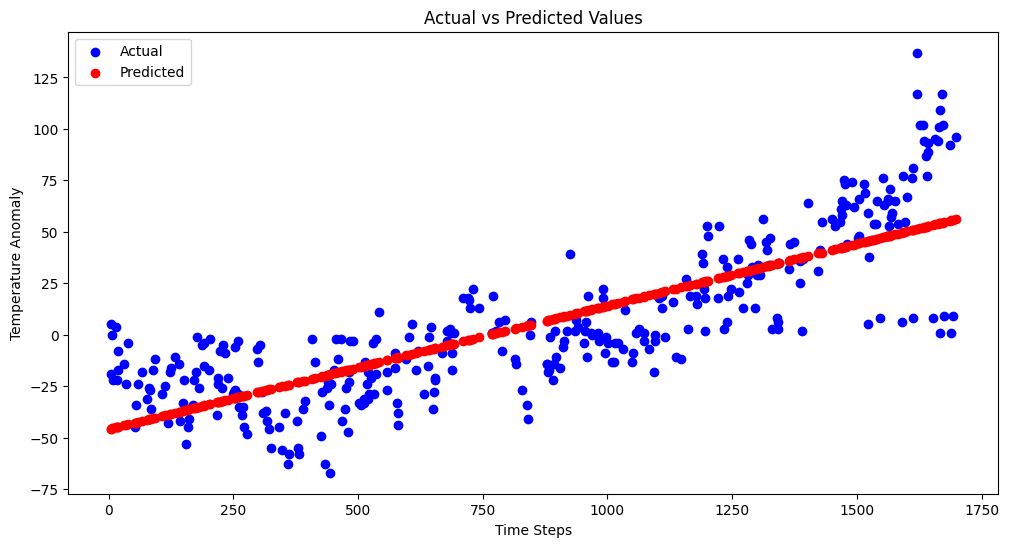

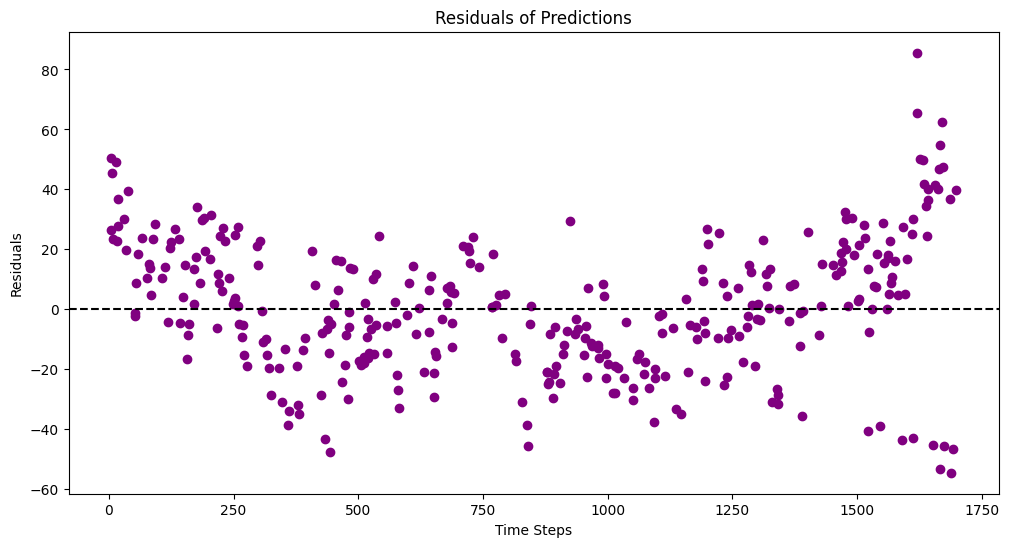

In [ ]:

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()

# Plotting Residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(X_test, residuals, color='purple')
plt.title('Residuals of Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Assuming 'df' is your DataFrame where index is the year and columns are months
# Convert the DataFrame into a single column of values
values = df.values.flatten()

# Create a time series with these values
time_series = pd.Series(values)

# Splitting the data into training and testing sets
# Let's say we keep the last 12 values for testing
train = time_series[:-12]
test = time_series[-12:]

# Creating and fitting the ARIMA model
# The order (p,d,q) needs to be chosen based on the specific characteristics of your data
model = ARIMA(train, order=(5,1,0))  # Example order, you might need to adjust it
fitted_model = model.fit()


In [ ]:
# Forecasting the next 12 values
forecast = fitted_model.forecast(steps=12)

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 28.66499131716706
Mean Squared Error (MSE): 1376.109428807443


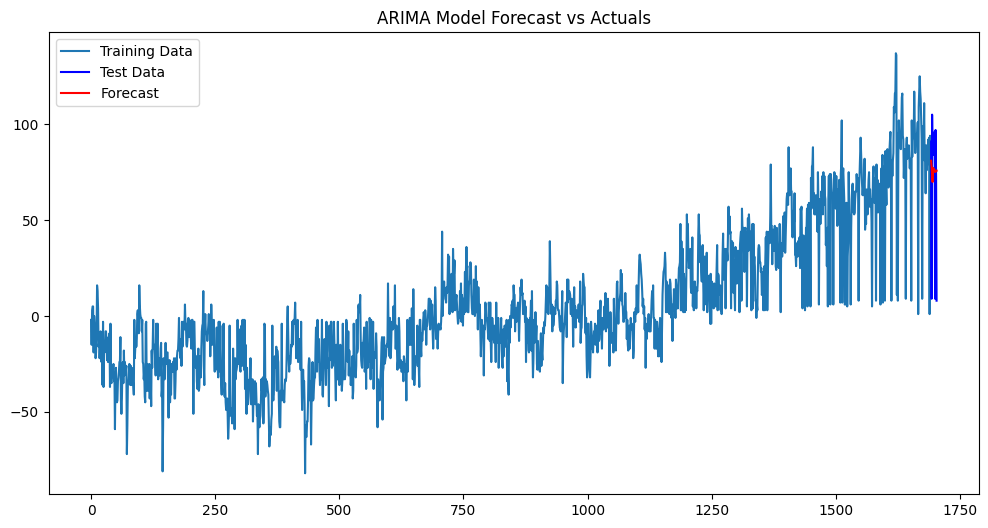

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend()
plt.show()

# Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(time_steps, values, test_size=0.2, random_state=0)

# Reshape for compatibility with the model
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Create and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

Mean Squared Error (MSE): 345.3318500975435
Mean Absolute Error (MAE): 13.186478881493212


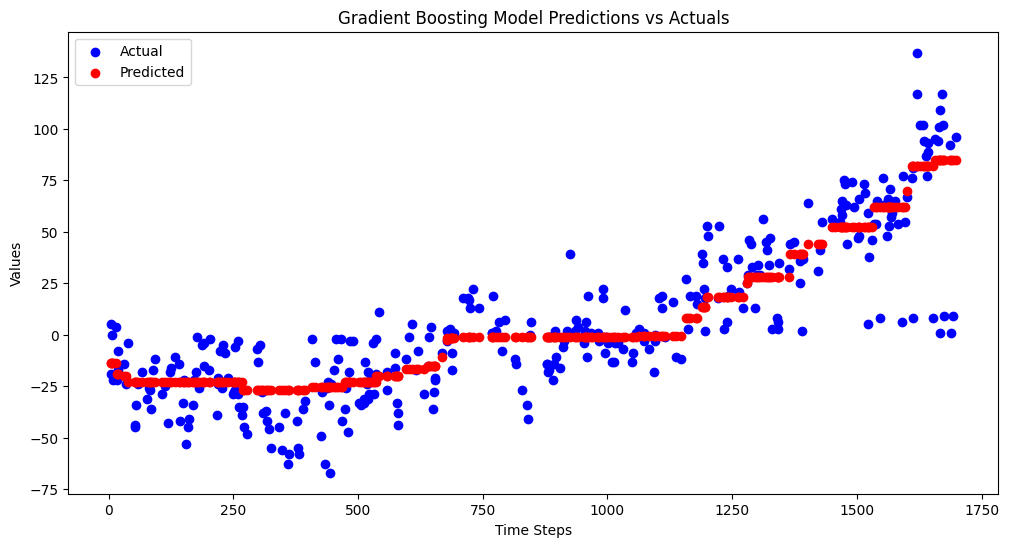

In [ ]:
# Predicting values
predictions = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plotting the results
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Gradient Boosting Model Predictions vs Actuals')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Create a Support Vector Regression model
# Using a pipeline to combine standard scaling and the SVR model
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the model
svr_model.fit(X_train, y_train.ravel())  # y_train.ravel() is used to convert y_train to a 1D array

# Make predictions
y_pred_svr = svr_model.predict(X_test)

In [ ]:
# Calculate performance metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Output performance metrics
print(f'Mean Absolute Error (MAE) for SVR: {mae_svr}')
print(f'Mean Squared Error (MSE) for SVR: {mse_svr}')

Mean Absolute Error (MAE) for SVR: 14.206368917283841
Mean Squared Error (MSE) for SVR: 367.7797069077993


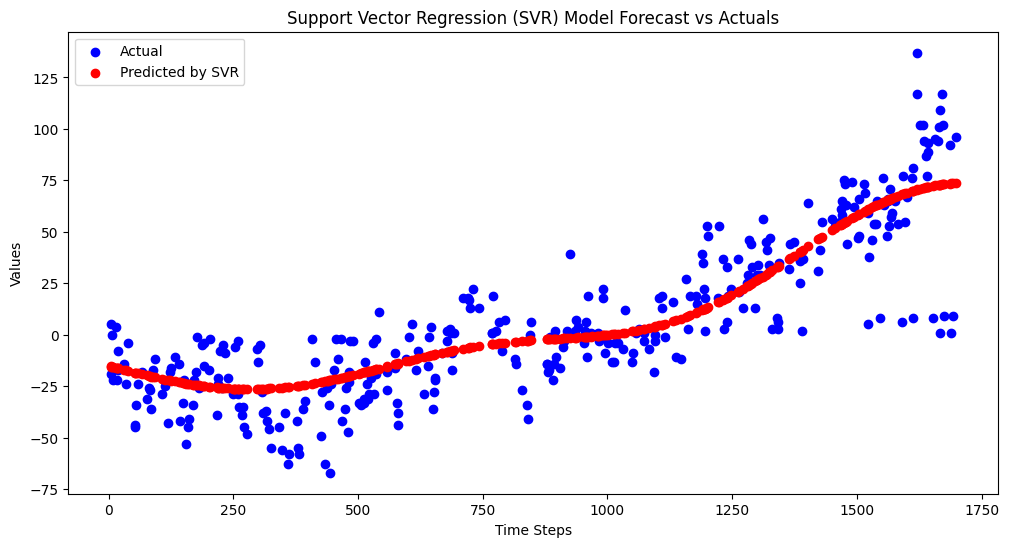

In [ ]:
# Plotting the results
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_svr, color='red', label='Predicted by SVR')
plt.title('Support Vector Regression (SVR) Model Forecast vs Actuals')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()